<a href="https://colab.research.google.com/github/LVanessaS/Space-Mission-Launches/blob/main/Space_Mission_Launches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook se realizará la limpieza, transformación y análisis del dataset:
https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization

# ***SPACE MISSION LAUNCHES***

# **1. EL PROBLEMA DEL NEGOCIO**


Las preguntas que resolveremos en este análisis son:

*   ¿Qué organización lanzó más misiones espaciales en un año determinado?
*  ¿Cuántos lanzamientos se realizaron por año?
*   ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?
*   ¿Qué meses son los más populares para los lanzamientos?
*   ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

# **2. EL SET DE DATOS**


Este Data set incluye todas las misiones espaciales desde el comienzo de la carrera espacial entre EE.UU y la Unión Soviética.

La información recolectada se encuentra en un archivo CSV (mission_launches.csv) y cuenta con 4324 filas y 9 columnas.
En esta data encontramos las siguientes columnas:



1.   **"Organisation"**: Organización o empresa que lideró el lanzamiento espacial.
2.   **"Location"**: País que lideró el lanzamiento espacial.

1.   **"Date"**: Fecha de lanzamiento.
2.   **"Detail"**: Detalles del lanzamiento espacial.

1.   **"Rocket_Status"**: Pais
2.   **"Price"**: Valor del lanzamiento espacial.

1.   **"Mission_Status"**: Estado de la misión: Exito o Fracaso.
2.   **"Unnamed: 0.1"**: Id

1.   **"Unnamed: 0"**: Id

# **3. UNA PRIMERA MIRADA AL DATASET**

In [1]:
#Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Lectura del dataset
df = pd.read_csv('/content/mission_launches.csv')

In [2]:
print(df.shape)
df.head()

(4324, 9)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


# **4. LIMPIEZA**

## Columnas innecesarias

Empezaremos eliminando las columnas **Unnamed: 0.1** y **Unnamed: 0** ya que no nos brindan información de interes para las preguntas que queremos responder.

In [4]:
#Acotamos las columnas necesarias.
df = df[['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']]
# Separamos la información de la columna "Location".
df[['Location_1','Location_2','Location_3','Location_4']] = df["Location"].str.split(',', expand=True)

<ipython-input-4-7202470383ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Location_1','Location_2','Location_3','Location_4']] = df["Location"].str.split(',', expand=True)


In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date']=df['Date'].astype(str)

df['Date_N'] = df['Date'].apply(lambda x: x[0:10] if x else '')
df['Date_N'] = pd.to_datetime(df['Date_N'],format = '%Y-%m-%d' ,errors='coerce')

In [6]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Organisation', 'Location', 'Location_1','Location_2','Location_3','Location_4', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status','Date_N']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Organisation: 56 subniveles
Columna Location: 137 subniveles
Columna Location_1: 130 subniveles
Columna Location_2: 44 subniveles
Columna Location_3: 26 subniveles
Columna Location_4: 3 subniveles
Columna Detail: 4278 subniveles
Columna Rocket_Status: 2 subniveles
Columna Price: 56 subniveles
Columna Mission_Status: 4 subniveles
Columna Date_N: 3922 subniveles


In [ ]:
df.describe()

## Valores nulos o faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 4323. Sin embargo la columna "Price" tiene solo 964 valores no nulos.


In [8]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].replace(',', '', regex=True)
df['Price'] = df['Price'].astype(float)


In [9]:
df['Price'] = df['Price'].interpolate(method='linear')
df.describe()

,Price
count,4324.000000
mean,412.842550
std,494.527627
min,5.300000
25%,62.000000
50%,209.928571
75%,594.922402
max,5000.000000


## Valores duplicados

In [10]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (4324, 12)
Tamaño del set después de eliminar las filas repetidas: (4323, 12)


In [11]:
df['Country'] = df['Location_3']

df['Country'].fillna(df['Location_2'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4323 non-null   object        
 1   Location        4323 non-null   object        
 2   Date            4323 non-null   object        
 3   Detail          4323 non-null   object        
 4   Rocket_Status   4323 non-null   object        
 5   Price           4323 non-null   float64       
 6   Mission_Status  4323 non-null   object        
 7   Location_1      4323 non-null   object        
 8   Location_2      4323 non-null   object        
 9   Location_3      4300 non-null   object        
 10  Location_4      1650 non-null   object        
 11  Date_N          4323 non-null   datetime64[ns]
 12  Country         4323 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 472.8+ KB


## Valores extremos

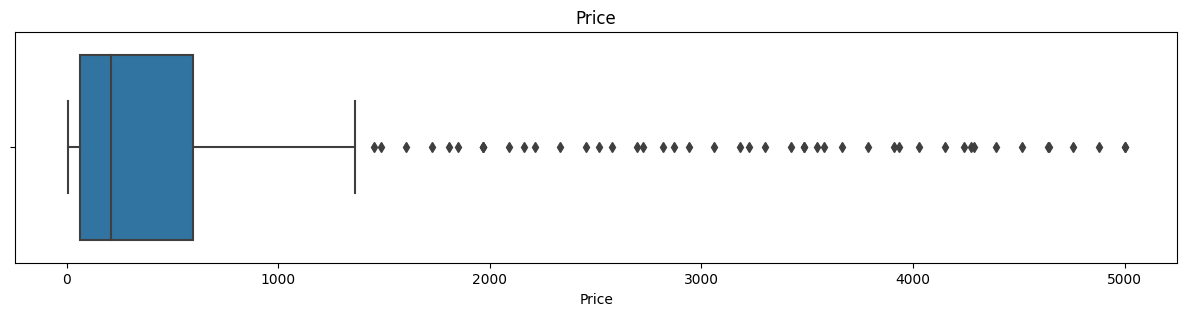

In [13]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes

cols_num = ['Price']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title(col)

## Errores tipográficos

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


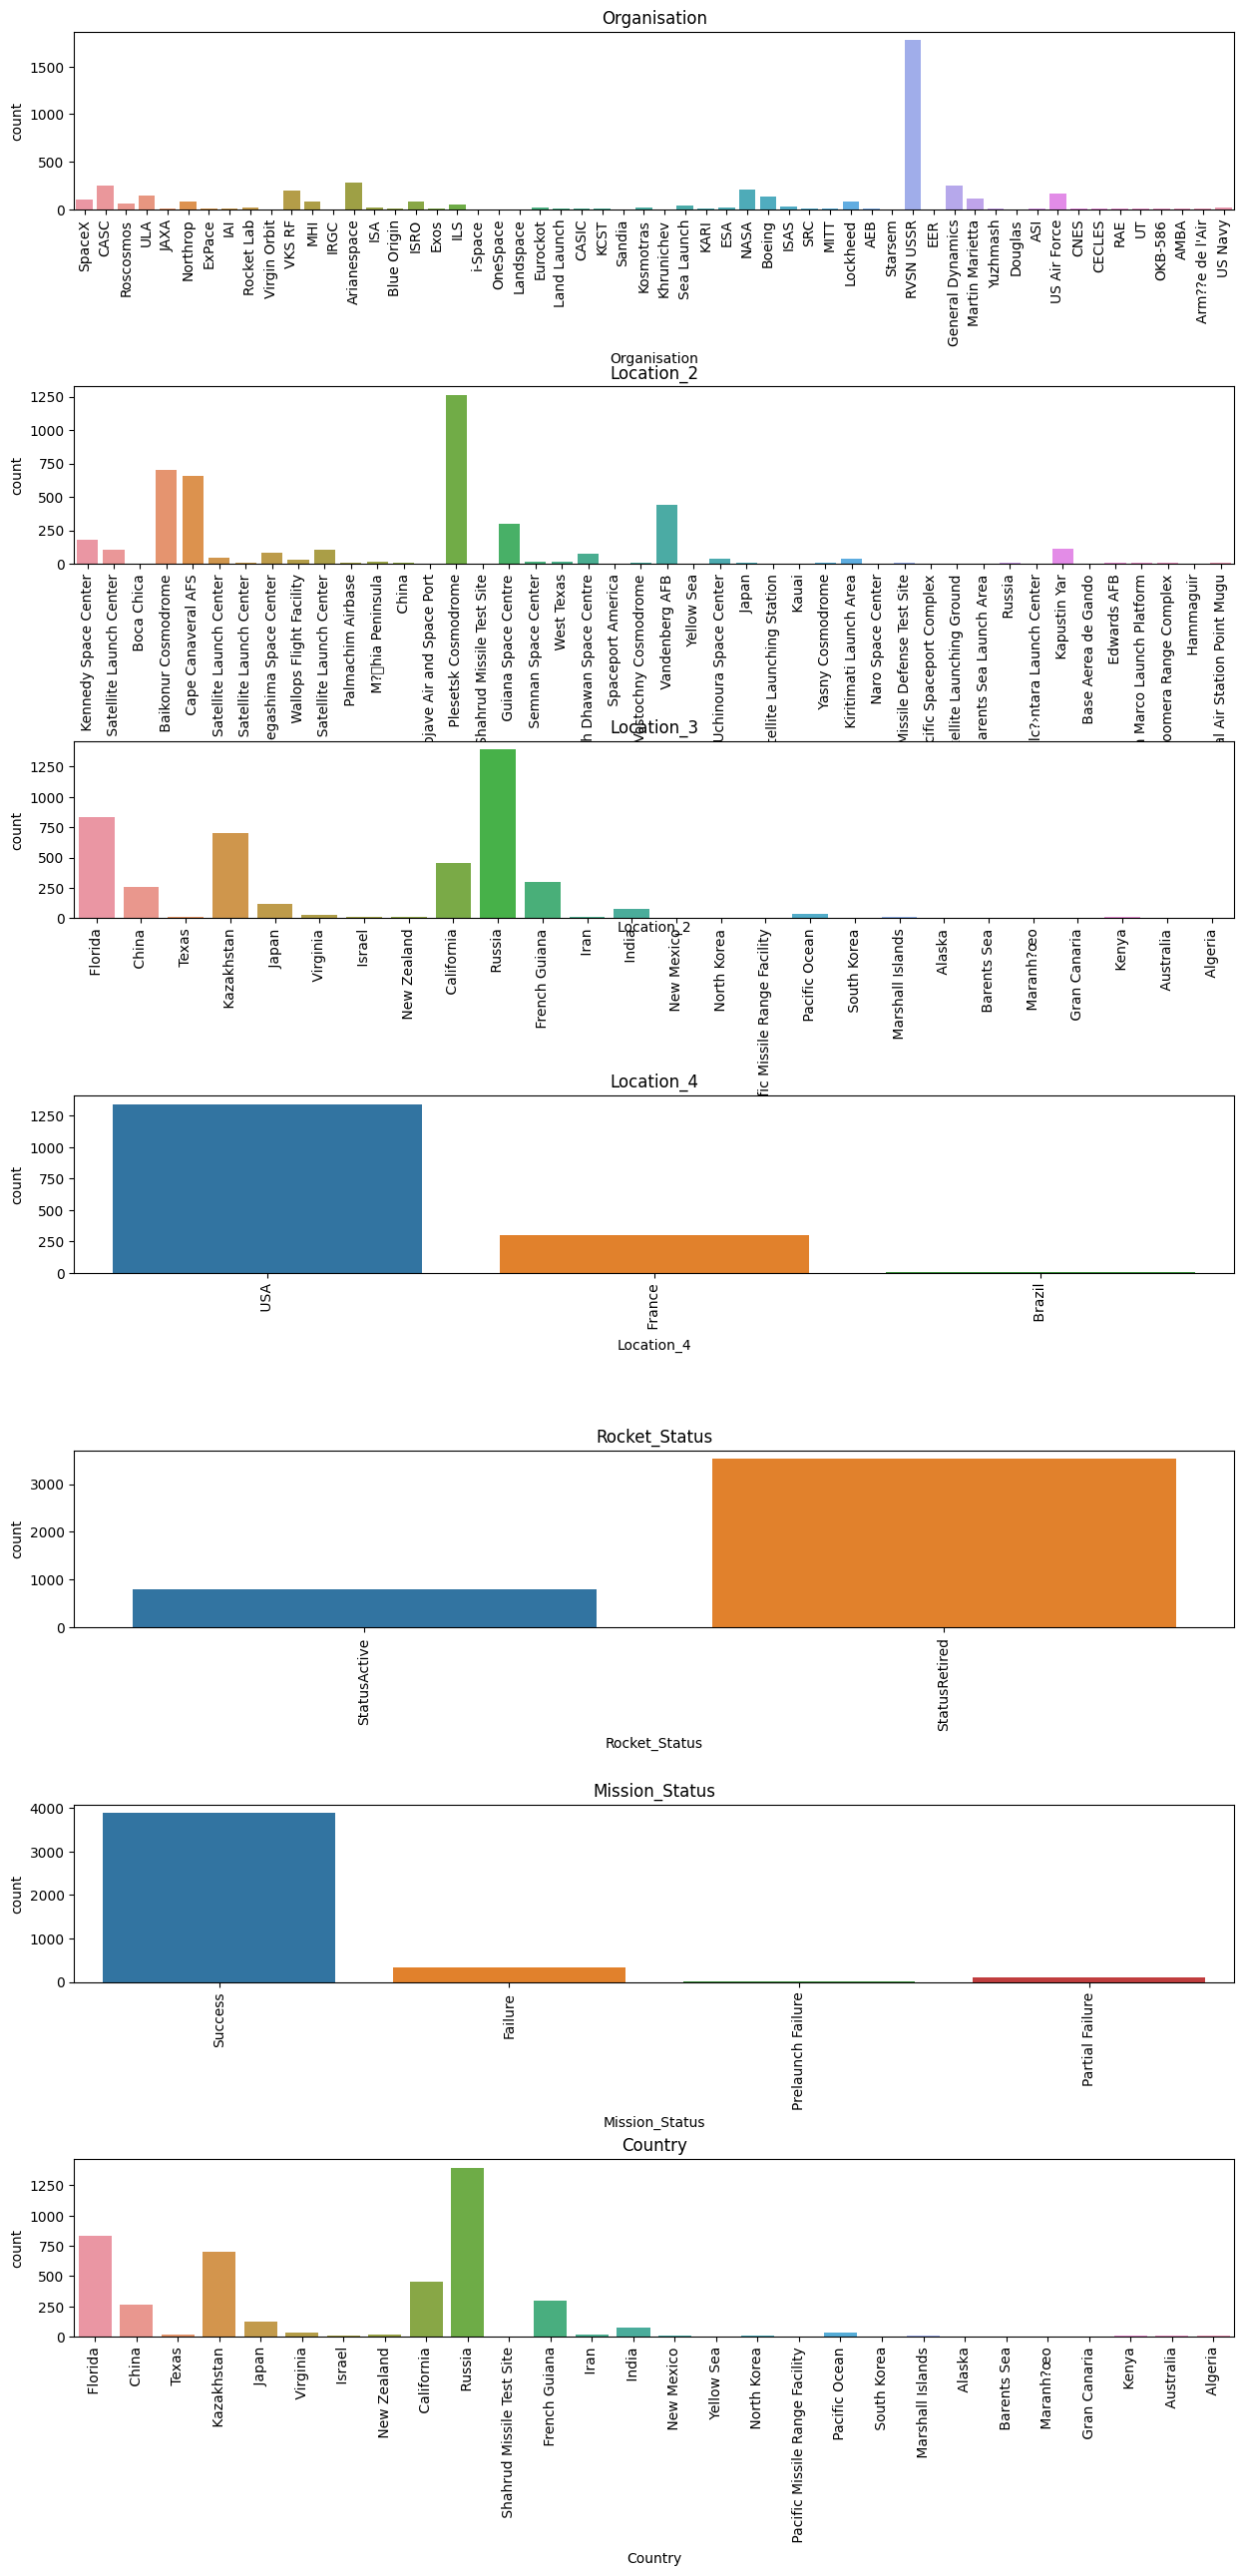

In [14]:
# Graficar los subniveles de cada variable categórica

cols_cat = ['Organisation','Location_2','Location_3','Location_4', 'Rocket_Status', 'Mission_Status','Country']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(15,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

##**5. RESPUESTAS PREGUNTAS**



---



---



*   ***¿Qué organización lanzó más misiones espaciales en un año determinado?*** 🚀🚀🚀


In [15]:
df['Year'] = df['Date_N'].dt.year

In [17]:
# Agrupar por 'Año' y 'Organizaciones' y contar la cantidad de lanzamientos
conteo_lanzamientos = df.groupby(['Year', 'Organisation']).size().reset_index(name='Cantidad')

# Encontrar la organización que lanzó más misiones en cada año
max_lanzamientos_por_año = conteo_lanzamientos.loc[conteo_lanzamientos.groupby('Year')['Cantidad'].idxmax()]

max_lanzamientos_por_año_ordenado = max_lanzamientos_por_año.sort_values(by='Cantidad', ascending=False)

# Mostrar el resultado
max_lanzamientos_por_año_ordenado.head(5)


,Year,Organisation,Cantidad
139,1977,RVSN USSR,97
132,1976,RVSN USSR,95
93,1971,RVSN USSR,93
125,1975,RVSN USSR,89
80,1970,RVSN USSR,87


La organización que más misiones espaciales realizó en un año determinado fue ***RVSN USSR***, y fue en el año 1977 realizando 97 lanzamientos.✅



---



---



*  ***¿Cuántos lanzamientos se realizaron por año?*** 🚀🚀🚀


In [18]:
lanzamientos_por_año = df.groupby('Year').size().reset_index(name='Cantidad')
lanzamientos_por_año_ordenado = lanzamientos_por_año.sort_values(by='Cantidad', ascending=False)
lanzamientos_por_año_ordenado

,Year,Cantidad
14,1971,119
61,2018,117
20,1977,114
19,1976,113
18,1975,113
...,...,...
53,2010,37
48,2005,37
1,1958,28
2,1959,20


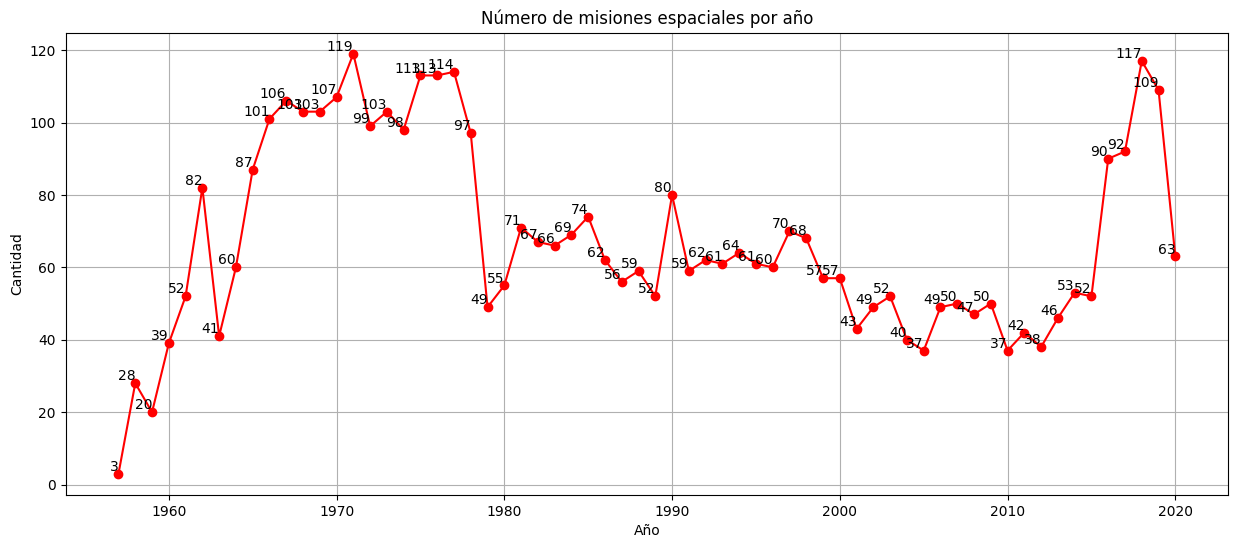

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(lanzamientos_por_año['Year'], lanzamientos_por_año['Cantidad'], marker='o', linestyle='-', color='red')
plt.title('Número de misiones espaciales por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)

for i, row in lanzamientos_por_año.iterrows():
    plt.text(row['Year'], row['Cantidad'], str(row['Cantidad']), ha='right', va='bottom')


plt.show()



---



---



*   ***¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?*** 🚀🚀🚀


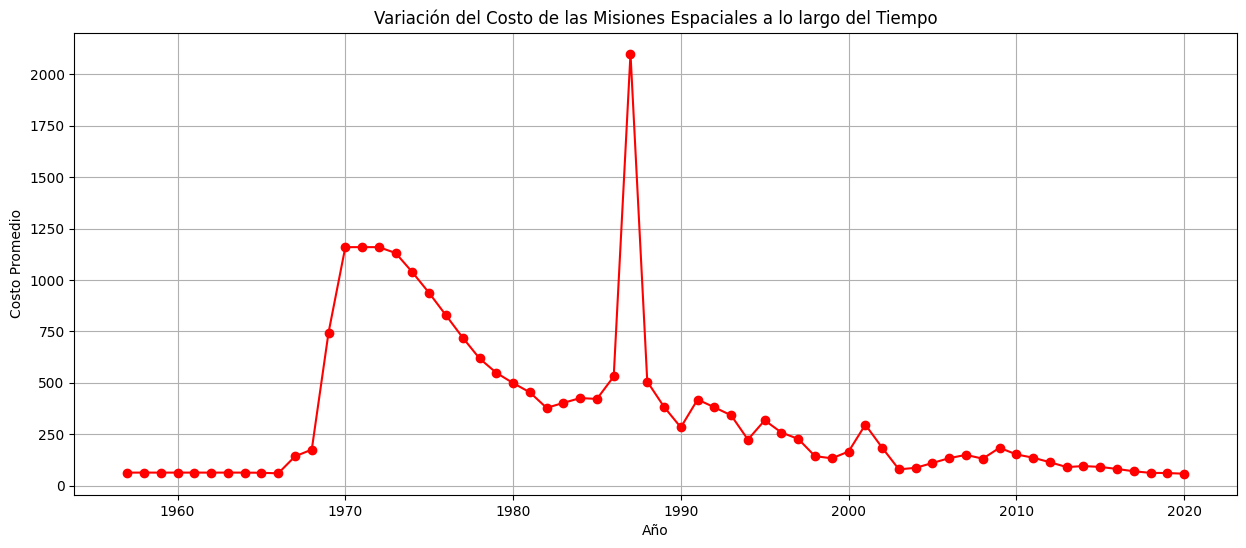

In [20]:
# Agrupar por 'Año' y calcular el costo promedio de las misiones espaciales
costo_promedio_por_año = df.groupby('Year')['Price'].mean().reset_index()

# Graficar la variación del costo a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(costo_promedio_por_año['Year'], costo_promedio_por_año['Price'], marker='o', linestyle='-', color='red')
plt.title('Variación del Costo de las Misiones Espaciales a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Costo Promedio')
plt.grid(True)
plt.show()


El costo de las misiones espaciales ha tenido un decrecimiento importante, en la última década las misiones no superan los 100 millones de dolares. ✅



---



---



*   ***¿Qué meses son los más populares para los lanzamientos?***🚀🚀🚀


In [21]:
df['Month'] = df['Date_N'].dt.month

In [22]:
lanzamientos_por_mes = df.groupby('Month').size().reset_index(name='Cantidad')
lanzamientos_por_mes_ordenado = lanzamientos_por_mes.sort_values(by='Cantidad', ascending=False)
lanzamientos_por_mes_ordenado

,Month,Cantidad
11,12,450
5,6,402
3,4,383
9,10,381
7,8,373
8,9,365
2,3,353
6,7,351
1,2,336
10,11,335


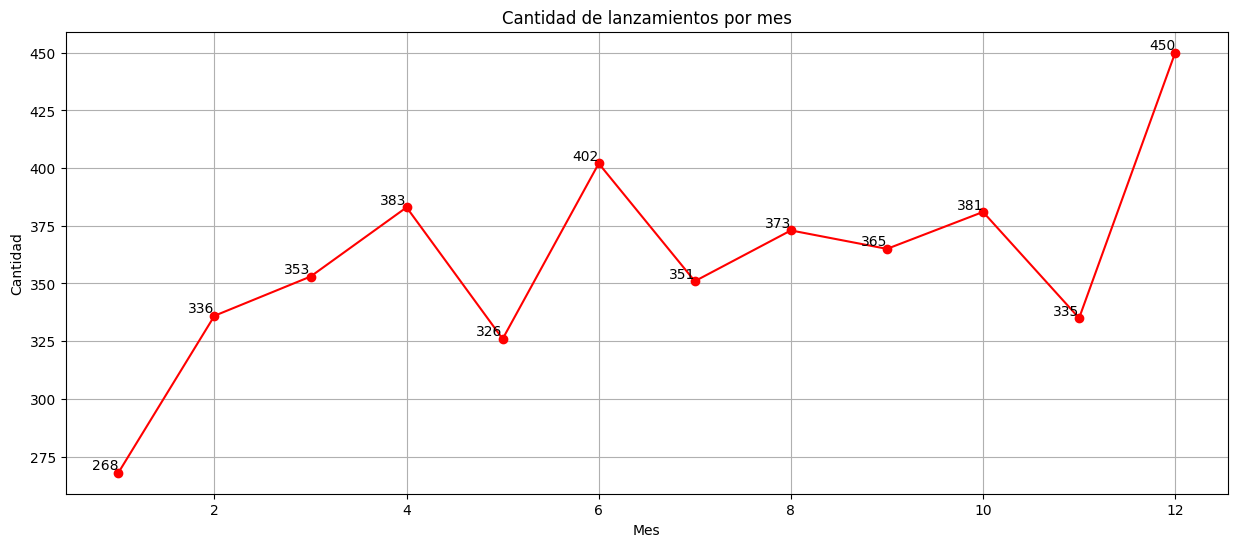

In [23]:
# Agrupar por 'Año' y calcular el costo promedio de las misiones espaciales
lanzamientos_por_mes = df.groupby('Month').size().reset_index(name='Cantidad')

# Graficar la variación del costo a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(lanzamientos_por_mes['Month'], lanzamientos_por_mes['Cantidad'], marker='o', linestyle='-', color='red')
plt.title('Cantidad de lanzamientos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.grid(True)

# Agregar etiquetas de texto en cada vértice
for i, row in lanzamientos_por_mes.iterrows():
    plt.text(row['Month'], row['Cantidad'], str(row['Cantidad']), ha='right', va='bottom')

plt.show()

El mes más popular para realizar lanzamientos es ***Diciembre***. ✅



---



---



*   ***¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?***🚀🚀🚀

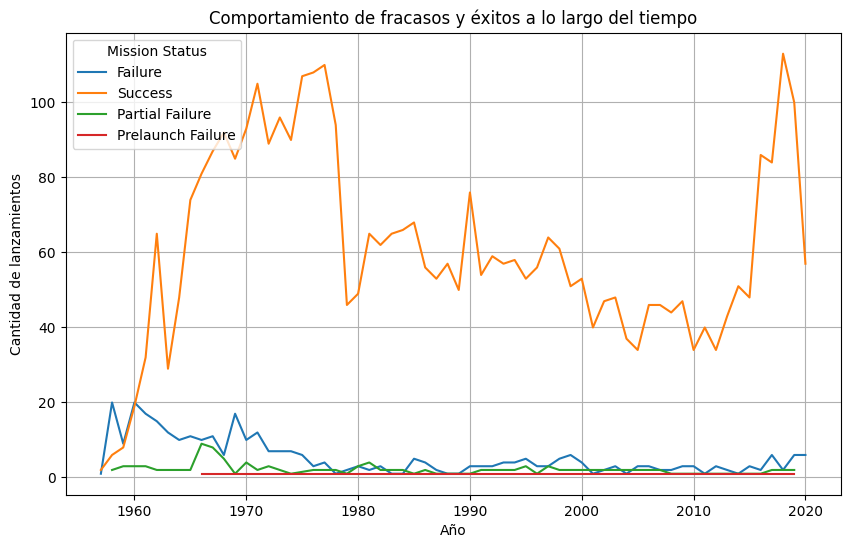

In [24]:
# Agrupar por 'Year' y 'Mission_Status' y contar la cantidad de lanzamientos
cambios_lanzamientos = df.groupby(['Year', 'Mission_Status']).size().reset_index()

# Crear un gráfico de línea
plt.figure(figsize=(10, 6))
for status in cambios_lanzamientos['Mission_Status'].unique():
    subset = cambios_lanzamientos[cambios_lanzamientos['Mission_Status'] == status]
    plt.plot(subset['Year'], subset[0], label=status)

# Configurar la leyenda y su ubicación
plt.legend(title='Mission Status', loc='upper left')

# Configurar elementos del gráfico
plt.title('Comportamiento de fracasos y éxitos a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de lanzamientos')
plt.grid(True)
plt.show()


Sin duda, las posibilidades de fracaso (Linea Azul) han disminuido significativamente con los años, por lo que cada vez es menos común que una misión espacial fallé. Además, aunque las cifras de éxito (Linea anaranjada) son significaticas, estas no presentan un patrón de crecimiento o decrecimiento. ✅